<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/Software_Defect_Prediction_SVM_ADABOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymrmr

     |████████████████████████████████| 71kB 2.5MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.8-cp36-cp36m-linux_x86_64.whl size=256804 sha256=8c040b88e5b831d3eb5cddf5dc28b2218251f863795304562eee1ad9bee74b2f
  Stored in directory: /root/.cache/pip/wheels/5b/ce/3a/bc9b80047f68973d909a35bb8e3062b7c7377510607ec35998
Successfully built pymrmr


In [ ]:
!pip install imblearn

In [ ]:
res_boost=[]
res_svm=[]
res_RF=[]

In [ ]:
import pandas as pd
files=['pc2.csv','PC3.xlsx','pc4.csv']
selec=2
print(files[selec])
try:
  df=pd.read_excel(files[selec])
except:
  df=pd.read_csv(files[selec])

pc4.csv


**DATA PREPROCESSING**

In [ ]:

df.loc[df['HALSTEAD_LENGTH']!=df['NUM_OPERANDS']+df['NUM_OPERATORS']]
df.loc[df['CYCLOMATIC_COMPLEXITY']>1+df['NUM_OPERATORS']]
df.loc[df['CALL_PAIRS']>df['NUM_OPERATORS']]
df['CYCLOMATIC_COMPLEXITY'].sum()/len(df)
max(df['CYCLOMATIC_COMPLEXITY'])
df=df.loc[df['LOC_COMMENTS']<=df['LOC_TOTAL']]
df.columns
df.isna().sum()
X=df.drop('c',axis=1)

In [ ]:
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,17,11,5,2,8,20,6,0.25,10,2,4,0.67,29,1,0,22,7,37.84,13.83,7233.63,0.17,102,0.07,401.87,523.19,0.17,5,10,25,0.11,53,49,23,12,57,31.25,24,False
1,2,9,3,0,1,16,5,0.56,6,2,3,0.60,17,4,0,9,1,12.50,13.00,2112.70,0.05,37,0.08,117.37,162.52,0.80,5,8,14,0.36,13,24,7,14,14,10.00,9,False
2,2,5,1,1,1,6,3,0.17,2,3,2,0.67,8,3,1,17,1,15.99,12.44,2476.90,0.07,44,0.08,137.61,199.04,1.00,2,3,7,0.13,16,28,9,14,23,10.53,18,False
3,4,5,1,0,0,8,3,0.30,4,2,2,0.67,11,1,0,10,0,21.06,5.85,720.66,0.04,29,0.17,40.04,123.19,0.33,2,4,10,0.19,13,16,10,9,16,0.00,10,False
4,7,5,1,3,0,0,3,0.15,0,0,1,0.33,11,1,0,17,2,21.09,13.00,3563.68,0.09,72,0.08,197.98,274.13,0.33,0,0,10,0.11,26,46,7,7,28,15.00,20,False


**DATA DISCRETIZATION**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
Xt = est.fit_transform(X) 

**FEATURE SELECTION**

In [ ]:
af=pd.DataFrame(Xt)
af['c']=df['c']
print(af.head())
af=af.fillna(0)

     0    1    2    3    4    5    6  ...   31   32   33   34   35   36      c
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  False
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  False
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  False
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  False
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  False

[5 rows x 38 columns]


In [ ]:
af.columns=df.columns

In [ ]:
import pymrmr
cols=pymrmr.mRMR(af, 'MIQ',10)
data=af[cols]
data.head()

,LOC_COMMENTS,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,LOC_CODE_AND_COMMENT,CYCLOMATIC_DENSITY,MODIFIED_CONDITION_COUNT,LOC_EXECUTABLE,DESIGN_DENSITY,DECISION_COUNT,PERCENT_COMMENTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pymrmr.mRMR(af, 'MID',10)

['LOC_COMMENTS',
 'HALSTEAD_DIFFICULTY',
 'LOC_CODE_AND_COMMENT',
 'DECISION_COUNT',
 'CYCLOMATIC_DENSITY',
 'LOC_EXECUTABLE',
 'HALSTEAD_CONTENT',
 'MODIFIED_CONDITION_COUNT',
 'PERCENT_COMMENTS',
 'DESIGN_DENSITY']

**MODEL BUILDING**

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,af['c'], test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 2) 
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
#print(X_train_res.shape, y_train_res.shape)
#print(X_test.shape, y_test.shape)


(975, 10) (975,)
(419, 10) (419,)


In [ ]:
#pd.DataFrame(y_train_res)

In [ ]:
y_train=y_train.astype('int')

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_3 = regressor.predict(X_test)
reslt=classification_report(y_test.astype('int'),y_pred_3.astype('int'),target_names=['Non-Defect','Defect'],output_dict=True)
print(reslt)

clf2=SVC(kernel='rbf', random_state=0, gamma=0.001)
#clf2=SVC(kernel='linear', random_state=0)

clf2.fit(X_train,y_train)
clf = AdaBoostClassifier(SVC(kernel='rbf', random_state=0, gamma=1000),n_estimators=10,       learning_rate=0.4, algorithm='SAMME')
clf.fit(X_train,y_train)



{'Non-Defect': {'precision': 0.8615751789976134, 'recall': 1.0, 'f1-score': 0.9256410256410257, 'support': 361}, 'Defect': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 58}, 'accuracy': 0.8615751789976134, 'macro avg': {'precision': 0.4307875894988067, 'recall': 0.5, 'f1-score': 0.46282051282051284, 'support': 419}, 'weighted avg': {'precision': 0.7423117890647695, 'recall': 0.8615751789976134, 'f1-score': 0.7975093323542011, 'support': 419}}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma=1000, kernel='rbf', max_iter=-1,
                                      probability=False, random_state=0,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.4, n_estimators=10, random_state=None)

In [ ]:
y_test

925     False
710     False
296     False
1003    False
913     False
        ...  
1214    False
850     False
44      False
250     False
98      False
Name: c, Length: 419, dtype: object

In [ ]:
y_test=y_test.astype('int')

**EVALUATION METRICS**

In [ ]:
y_pred=clf.predict(X_test)
y_pred_2=clf2.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)
classification_report(y_test, y_pred_2)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.93       361\n           1       0.00      0.00      0.00        58\n\n    accuracy                           0.86       419\n   macro avg       0.43      0.50      0.46       419\nweighted avg       0.74      0.86      0.80       419\n'

In [ ]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred,target_names=['Non-Defect','Defect']))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
reslt=classification_report(y_test,y_pred,target_names=['Non-Defect','Defect'],output_dict=True)
print(reslt)
res_boost.append([files[selec],reslt['accuracy'],reslt['Non-Defect']['precision'],reslt['Non-Defect']['recall'],reslt['Non-Defect']['f1-score']])

Accuracy: 0.8615751789976134
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

  Non-Defect       0.86      1.00      0.93       361
      Defect       0.00      0.00      0.00        58

    accuracy                           0.86       419
   macro avg       0.43      0.50      0.46       419
weighted avg       0.74      0.86      0.80       419


 confussion matrix:
 [[361   0]
 [ 58   0]]
{'Non-Defect': {'precision': 0.8615751789976134, 'recall': 1.0, 'f1-score': 0.9256410256410257, 'support': 361}, 'Defect': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 58}, 'accuracy': 0.8615751789976134, 'macro avg': {'precision': 0.4307875894988067, 'recall': 0.5, 'f1-score': 0.46282051282051284, 'support': 419}, 'weighted avg': {'precision': 0.7423117890647695, 'recall': 0.8615751789976134, 'f1-score': 0.7975093323542011, 'support': 419}}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_2))
print('F1 score:', f1_score(y_test, y_pred_2))
print('Recall:', recall_score(y_test, y_pred_2))
print('Precision:', precision_score(y_test, y_pred_2))
print('\n clasification report:\n', classification_report(y_test,y_pred_2,target_names=['Non-Defect','Defect']))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_2))
result=classification_report(y_test,y_pred_2,target_names=['Non-Defect','Defect'],output_dict=True)
print(result)
res_svm.append([files[selec],result['accuracy'],result['Non-Defect']['precision'],result['Non-Defect']['recall'],result['Non-Defect']['f1-score']])

Accuracy: 0.8615751789976134
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

  Non-Defect       0.86      1.00      0.93       361
      Defect       0.00      0.00      0.00        58

    accuracy                           0.86       419
   macro avg       0.43      0.50      0.46       419
weighted avg       0.74      0.86      0.80       419


 confussion matrix:
 [[361   0]
 [ 58   0]]
{'Non-Defect': {'precision': 0.8615751789976134, 'recall': 1.0, 'f1-score': 0.9256410256410257, 'support': 361}, 'Defect': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 58}, 'accuracy': 0.8615751789976134, 'macro avg': {'precision': 0.4307875894988067, 'recall': 0.5, 'f1-score': 0.46282051282051284, 'support': 419}, 'weighted avg': {'precision': 0.7423117890647695, 'recall': 0.8615751789976134, 'f1-score': 0.7975093323542011, 'support': 419}}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_3

array([0.08921566, 0.        , 0.06581502, 0.06581502, 0.08921566,
       0.11822733, 0.02583883, 0.10422092, 0.12825549, 0.08921566,
       0.16777639, 0.12825549, 0.12825549, 0.12825549, 0.12825549,
       0.12825549, 0.12825549, 0.08921566, 0.16777639, 0.12825549,
       0.12825549, 0.09673224, 0.09673224, 0.12307713, 0.12307713,
       0.12825549, 0.12825549, 0.08921566, 0.12825549, 0.09673224,
       0.06581502, 0.02730263, 0.12825549, 0.09673224, 0.12825549,
       0.        , 0.08921566, 0.06108219, 0.75      , 0.09673224,
       0.        , 0.12825549, 0.        , 0.12307713, 0.12307713,
       0.12825549, 0.16777639, 0.12825549, 0.02304035, 0.11822733,
       0.02583883, 0.08921566, 0.16777639, 0.08921566, 0.00553633,
       0.1       , 0.16777639, 0.11822733, 0.35349747, 0.00629731,
       0.67869048, 0.12307713, 0.02583883, 0.11822733, 0.11822733,
       0.12307713, 0.12825549, 0.10422092, 0.12825549, 0.12307713,
       0.02583883, 0.225     , 0.08921566, 0.11822733, 0.08921

In [ ]:
resul=classification_report(y_test.astype('int'),y_pred_3.astype('int'),target_names=['Non-Defect','Defect'],output_dict=True)
print(resul)
res_RF.append([files[selec],resul['accuracy'],resul['Non-Defect']['precision'],resul['Non-Defect']['recall'],resul['Non-Defect']['f1-score']])

{'Non-Defect': {'precision': 0.8615751789976134, 'recall': 1.0, 'f1-score': 0.9256410256410257, 'support': 361}, 'Defect': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 58}, 'accuracy': 0.8615751789976134, 'macro avg': {'precision': 0.4307875894988067, 'recall': 0.5, 'f1-score': 0.46282051282051284, 'support': 419}, 'weighted avg': {'precision': 0.7423117890647695, 'recall': 0.8615751789976134, 'f1-score': 0.7975093323542011, 'support': 419}}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Hybrid=pd.DataFrame(res_boost)
SVM=pd.DataFrame(res_svm)
RF=pd.DataFrame(res_RF)

In [ ]:
Data_Columns=['Data_Set','Accuracy','Precision','Recall','F1_Score']
Hybrid.columns=Data_Columns
SVM.columns=Data_Columns
RF.columns=Data_Columns

In [ ]:
RF

,Data_Set,Accuracy,Precision,Recall,F1_Score
0,pc2.csv,0.995698,0.995698,1.0,0.997844
1,PC3.xlsx,0.911111,0.911111,1.0,0.953488
2,pc4.csv,0.861575,0.861575,1.0,0.925641


In [ ]:
Hybrid

,Data_Set,Accuracy,Precision,Recall,F1_Score
0,pc2.csv,0.995698,0.995698,1.0,0.997844
1,PC3.xlsx,0.911111,0.911111,1.0,0.953488
2,pc4.csv,0.861575,0.861575,1.0,0.925641


In [ ]:
SVM

,Data_Set,Accuracy,Precision,Recall,F1_Score
0,pc2.csv,0.995698,0.995698,1.0,0.997844
1,PC3.xlsx,0.911111,0.911111,1.0,0.953488
2,pc4.csv,0.861575,0.861575,1.0,0.925641


In [ ]:
L=[]
L.append(Hybrid.loc[selec])
L.append(SVM.loc[selec])
wise=pd.DataFrame(L)
wise=wise.transpose()
wise.columns=['Hybrid','SVM']
wise.index[1:]

Index(['Accuracy', 'Precision', 'Recall', 'F1_Score'], dtype='object')

<BarContainer object of 4 artists>

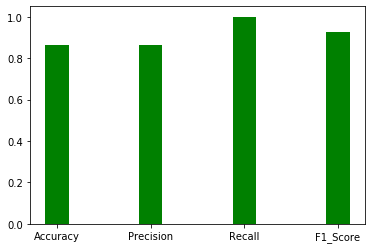

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(wise.index[1:], wise['SVM'][1:], color = 'g', width = 0.25)


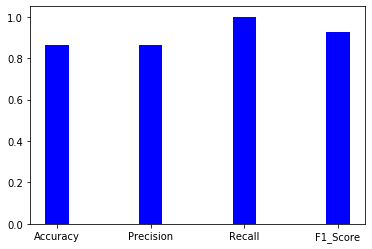

In [ ]:
plt.bar(wise.index[1:], wise['Hybrid'][1:], color = 'b', width = 0.25)
plt.show()

In [ ]:
import pymrmr
cols=pymrmr.mRMR(df, 'MIQ',10)
data=df[cols]
data.head()

MemoryError: ignored

In [ ]:
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,17,11,5,2,8,20,6,0.25,10,2,4,0.67,29,1,0,22,7,37.84,13.83,7233.63,0.17,102,0.07,401.87,523.19,0.17,5,10,25,0.11,53,49,23,12,57,31.25,24,False
1,2,9,3,0,1,16,5,0.56,6,2,3,0.60,17,4,0,9,1,12.50,13.00,2112.70,0.05,37,0.08,117.37,162.52,0.80,5,8,14,0.36,13,24,7,14,14,10.00,9,False
2,2,5,1,1,1,6,3,0.17,2,3,2,0.67,8,3,1,17,1,15.99,12.44,2476.90,0.07,44,0.08,137.61,199.04,1.00,2,3,7,0.13,16,28,9,14,23,10.53,18,False
3,4,5,1,0,0,8,3,0.30,4,2,2,0.67,11,1,0,10,0,21.06,5.85,720.66,0.04,29,0.17,40.04,123.19,0.33,2,4,10,0.19,13,16,10,9,16,0.00,10,False
4,7,5,1,3,0,0,3,0.15,0,0,1,0.33,11,1,0,17,2,21.09,13.00,3563.68,0.09,72,0.08,197.98,274.13,0.33,0,0,10,0.11,26,46,7,7,28,15.00,20,False
